In [1]:
rm -rf sample_data/

In [2]:
pwd

'/content'

#### upload wheat_bangalore.csv to /content folder

In [4]:
ls

Wheat_Bangalore.csv


In [14]:
# import statements
from pandas import read_csv, DataFrame, concat, datetime
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from numpy import mean
from math import sqrt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [6]:
# date format in data
dateparser = lambda x: datetime.strptime(x, '%Y-%m-%d')

In [9]:
# read data from csv file
series = read_csv('Wheat_Bangalore.csv', usecols=['Date','MeanPrice(Rs./Quintal)'], header=0, index_col=0, parse_dates=True, date_parser=dateparser)
series

,MeanPrice(Rs./Quintal)
Date,
2002-01-01,1100
2002-06-01,1200
2002-07-01,1184
2002-08-01,1176
2002-11-01,1150
...,...
2019-06-01,2900
2019-07-01,2900
2019-08-01,2900


In [12]:
# prepare data
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window,len(X))]
predictions = list()

In [13]:
# make predictions
for t in range(len(test)):
  length = len(history)
  y_predicted = mean([history[i] for i in range(length-window, length)])
  obs = test[t]
  
  predictions.append(y_predicted)
  history.append(obs)
  
  print('predicted = %f actual = %f' % (y_predicted,obs))

predicted = 1161.333333 actual = 1176.000000
predicted = 1186.666667 actual = 1150.000000
predicted = 1170.000000 actual = 1150.000000
predicted = 1158.666667 actual = 1150.000000
predicted = 1150.000000 actual = 1100.000000
predicted = 1133.333333 actual = 1100.000000
predicted = 1116.666667 actual = 1100.000000
predicted = 1100.000000 actual = 1100.000000
predicted = 1100.000000 actual = 1232.000000
predicted = 1144.000000 actual = 1350.000000
predicted = 1227.333333 actual = 1063.000000
predicted = 1215.000000 actual = 1021.000000
predicted = 1144.666667 actual = 1000.000000
predicted = 1028.000000 actual = 1002.000000
predicted = 1007.666667 actual = 1000.000000
predicted = 1000.666667 actual = 1021.000000
predicted = 1007.666667 actual = 1059.000000
predicted = 1026.666667 actual = 1100.000000
predicted = 1060.000000 actual = 1104.000000
predicted = 1087.666667 actual = 1326.000000
predicted = 1176.666667 actual = 1370.000000
predicted = 1266.666667 actual = 1260.000000
predicted 

In [15]:
# error calculation
rmse = sqrt(mean_squared_error(test, predictions))
print(f'RMSE = {rmse}')

RMSE = 144.47675930952536


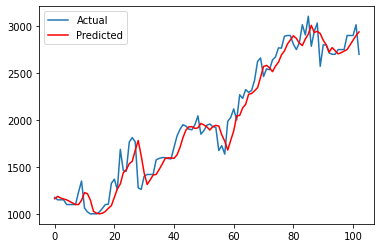

In [16]:
# plot actual values and predicted values
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()

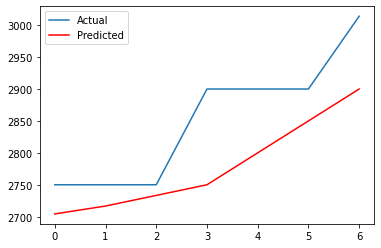

In [25]:
# plot last 7 values
plt.plot(test[-8:-1], label='Actual')
plt.plot(predictions[-8:-1], color='red', label='Predicted')
plt.legend()
plt.show()